In [10]:
# Read AQI Data, calculate average AQI in a week
# Read Population Data, Area Data, Make density 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df_temperature = pd.read_csv('../data/temperature.csv')
df_temperature = df_temperature[['city','country','oct','nov','dec']]
print(df_temperature)
# df_temperature.info
df_temperature.isna().sum()

            city    country   oct   nov   dec
0        Algiers    Algeria  15.2  15.2  12.1
1    Tamanrasset    Algeria  17.3  17.3  13.9
2        Reggane    Algeria  22.0  22.0  17.8
3         Luanda     Angola  26.7  26.7  26.9
4        Cotonou      Benin  27.6  27.6  27.3
..           ...        ...   ...   ...   ...
450         Lima       Peru  18.7  18.7  20.7
451        Piura       Peru  23.6  23.6  25.2
452   Paramaribo   Suriname  27.3  27.3  26.4
453   Montevideo    Uruguay  18.6  18.6  21.3
454      Caracas  Venezuela  22.0  22.0  20.7

[455 rows x 5 columns]


city       0
country    0
oct        0
nov        0
dec        0
dtype: int64

In [12]:
import re
def format_ascii_string(input=''):
    output = re.sub(r'[^\x00-\x7f]','-', input)
    return output

print(format_ascii_string("hi hi »"))

hi hi -


In [13]:
# Convert Datatype of Temperature to Float
df_temperature['dec'] = df_temperature['dec'].map(lambda x: format_ascii_string(x))
df_temperature['dec'] = df_temperature['dec'].map(lambda x: float(x))

df_temperature['oct'] = df_temperature['oct'].map(lambda x: format_ascii_string(x))
df_temperature['oct'] = df_temperature['oct'].map(lambda x: float(x))

df_temperature['nov'] = df_temperature['nov'].map(lambda x: format_ascii_string(x))
df_temperature['nov'] = df_temperature['nov'].map(lambda x: float(x))

In [14]:
from unidecode import unidecode
def remove_non_ascii(text):
    return unidecode(unidecode(text))
    
df_temperature['city'] = df_temperature['city'].map(lambda x: remove_non_ascii(x))


In [15]:
print(df_temperature)
print("Count Non Value")
print(df_temperature.isna().sum())
print(df_temperature.dtypes)
df_temperature.isna().sum()


            city    country   oct   nov   dec
0        Algiers    Algeria  15.2  15.2  12.1
1    Tamanrasset    Algeria  17.3  17.3  13.9
2        Reggane    Algeria  22.0  22.0  17.8
3         Luanda     Angola  26.7  26.7  26.9
4        Cotonou      Benin  27.6  27.6  27.3
..           ...        ...   ...   ...   ...
450         Lima       Peru  18.7  18.7  20.7
451        Piura       Peru  23.6  23.6  25.2
452   Paramaribo   Suriname  27.3  27.3  26.4
453   Montevideo    Uruguay  18.6  18.6  21.3
454      Caracas  Venezuela  22.0  22.0  20.7

[455 rows x 5 columns]
Count Non Value
city       0
country    0
oct        0
nov        0
dec        0
dtype: int64
city        object
country     object
oct        float64
nov        float64
dec        float64
dtype: object


city       0
country    0
oct        0
nov        0
dec        0
dtype: int64

In [16]:
# Read AQI
def average_AQI(file=''):
    df = pd.read_csv(file)
    # df = df[['city','AQI']]
    df_result = df.groupby('city').mean()
    return df_result

df_aqi = average_AQI('../ProcessedAQI/Final/aqi.csv')
df_aqi_1 = df_aqi[['AQI']]
df_aqi_1

,AQI
city,
Abeokuta,71.500000
Abidjan,64.583333
Abu Dhabi,84.512658
Abuja,88.750000
Acapulco de Juarez,70.546053
...,...
Zhaoqing,94.105263
Zhengzhou,166.096386
Zhenjiang Jiangsu,163.550633


In [17]:
import pandasql as ps
sql = 'SELECT * from df_aqi_1 JOIN df_temperature ON df_aqi_1.city = df_temperature.city'
df_result = ps.sqldf(sql,locals())
df_result

,city,AQI,city,country,oct,nov,dec
0,Algiers,78.250000,Algiers,Algeria,15.2,15.2,12.1
1,Luanda,134.000000,Luanda,Angola,26.7,26.7,26.9
2,Cotonou,75.235294,Cotonou,Benin,27.6,27.6,27.3
3,Ouagadougou,126.222222,Ouagadougou,Burkina Faso,27.7,27.7,25.1
4,Bujumbura,53.200000,Bujumbura,Burundi,23.4,23.4,23.6
...,...,...,...,...,...,...,...
232,Quito,40.662651,Quito,Ecuador,14.3,14.3,14.4
233,Asuncion,99.733333,Asuncion,Paraguay,24.9,24.9,26.5
234,Lima,74.909639,Lima,Peru,18.7,18.7,20.7
235,Montevideo,104.000000,Montevideo,Uruguay,18.6,18.6,21.3


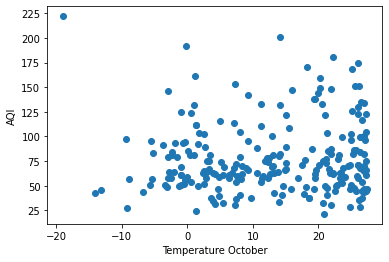

In [18]:
import matplotlib.pyplot as plt 

y = df_result['AQI'].tolist()
x = df_result['dec'].tolist()
plt.scatter(x,y)
plt.xlabel('Temperature October')
plt.ylabel('AQI')

plt.show()